<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/Rigo_3_2_Equipo_1_Google_Colab_Algoritmos_de_mejoramiento_de_im%C3%A1genes_en_el_dominio_espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

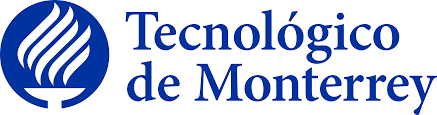

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 3.2 Google Colab - Algoritmos de mejoramiento de imágenes en el dominio espacia




**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

##3.2

Los ejercicios que deben agregarse a este proyecto seran las siguientes:

- Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?
- Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.
- Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpig
%matplotlib inline

In [ ]:
def gethistogram(im,title):
  hist_full = cv.calcHist([im],[0],None,[256],[0,256])
  plt.plot(hist_full)
  plt.title(title)
  plt.show()

In [ ]:
def genhistcolor(im):
  color = ('b', 'g', 'r')
  plt.figure(figsize=([10, 10]))
  for i, col in enumerate(color):
      
      histr = cv.calcHist([im], 
                         [i], None,
                         [256], 
                         [0, 256])
      
      plt.plot(histr, color = col)
      
    # Limit X - axis to 256
      plt.xlim([0, 256])
      
  plt.show()

## 1. Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

###Usando el operador Sobel

Sobel es un operador muy común para detectar bordes de una imagen, que es una aproximación a una derivada de una imagen. Está separado en las direcciones y y x. Aquí usamos una matriz kernel 3*3, una para cada dirección x e y. El degradado para la dirección x tiene números negativos a la izquierda y números positivos a la derecha y estamos preservando los píxeles centrales. De manera similar, el degradado para la dirección y tiene números negativos en la parte inferior y números positivos en la parte superior y aquí estamos en el medio fila de píxeles.

Orginal 



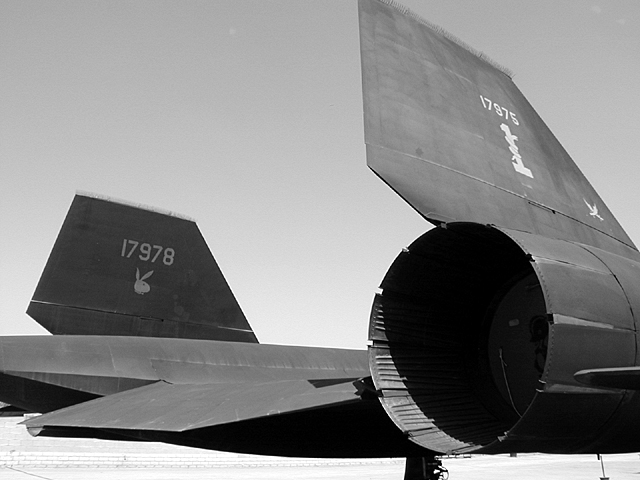

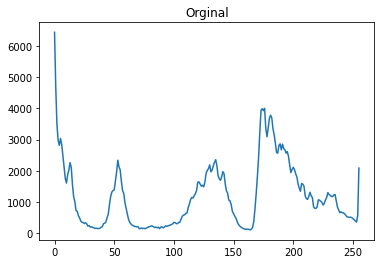

In [ ]:
urlclahe = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/3.2 Images/jet.jpg"
img_Sobel = io.imread(urlclahe)  
print("Orginal \n")
cv2_imshow(cv.cvtColor(img_Sobel, cv.COLOR_BGR2RGB))
gethistogram(img_Sobel,"Orginal")


### Convolución
La función de convolución realiza el filtrado de los valores de píxel de una imagen, lo que se puede utilizar para aumentar su nitidez, difuminarla, detectar sus ejes u otros realces basados en el kernel. Los filtros se utilizan para mejorar la calidad de la imagen de ráster al eliminar datos falsos o mejorar las entidades de los datos. Estos filtros de convolución se aplican a un kernel móvil o superpuesto (ventana o vecindad), como 3 x 3. Los filtros de convolución actúan calculando el valor de píxel en función de la ponderación de sus vecinos

In [ ]:
# with image X and filter F
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

###Usando el operador de Sobel

Con el fin de resaltar rasgos de interés, la metodología de detección de bordes llamada Sobel. Ampliamente difundido en aplicaciones de procesamiento de imágenes, el filtro Sobel permite estimar la magnitud del gradiente espacial en imágenes. El filtro Sobel detecta los bordes horizontales y verticales separadamente sobre una imagen en escala de grises. Las imágenes en color se convierten en RGB en niveles de grises. Como con el filtro Laplace, el resultado es una imagen transparente con líneas negras y algunos restos de color.

In [ ]:
def sobel(imagen):
  Gx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
  Gy = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
  sob_x = convolve(imagen, Gx) / 8.0
  sob_y = convolve(imagen, Gy) / 8.0
  #calculate the gradient magnitude of vectors
  sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
  # mapping values from 0 to 255
  sob_out = (sob_out / np.max(sob_out)) * 255

  return sob_out

Sobel Image 



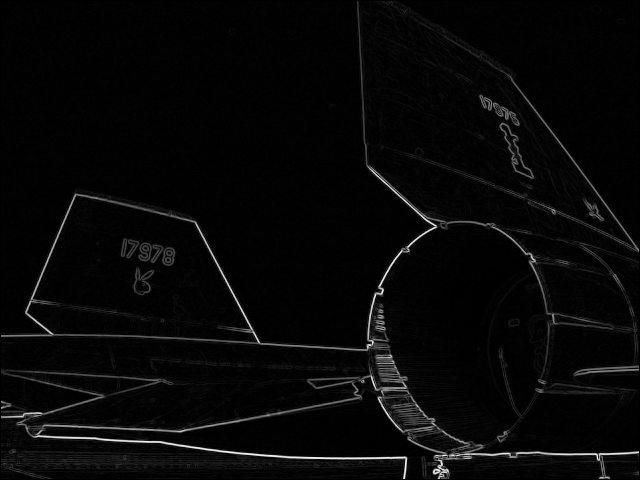

In [ ]:
print("Sobel Image \n")
sob_out = sobel(img_Sobel) 
cv2_imshow(sob_out)


###Usando el operador de prewitt

El operador de Prewitt es similar al operador de Sobel y se utiliza para detectar bordes verticales y horizontales en imágenes. Nos proporciona dos máscaras, una para detectar bordes en dirección horizontal y otra para detectar bordes en dirección vertical. 

Orginal 



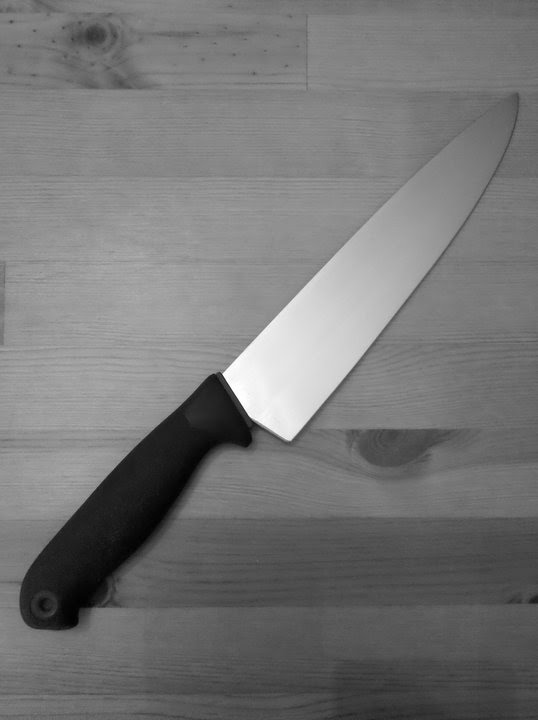

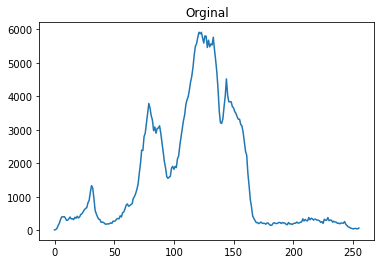

In [ ]:
urlclahe = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/3.2 Images/knife.jpg"
img_Prewitt = cv.imread(urlclahe,cv.IMREAD_GRAYSCALE) 
print("Orginal \n")
cv2_imshow(img_Prewitt)
gethistogram(img_Prewitt,"Orginal")

In [ ]:
def Prewitt(imagen):
  Hx =  np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
  Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
  pre_x = convolve(imagen, Hx) 
  pre_y = convolve(imagen, Hy)
  
  #calculate the gradient magnitude of vectors
  pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
  # mapping values from 0 to 255
  pre_out = (pre_out / np.max(pre_out)) * 255


  return pre_out

Prewitt Image 



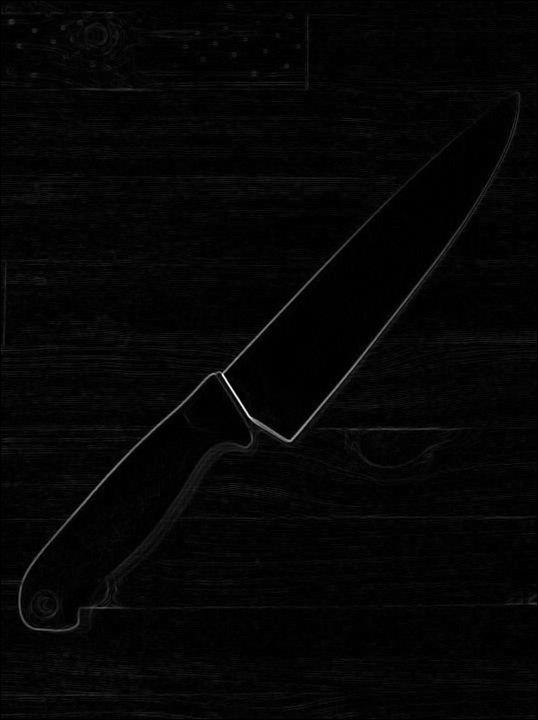

In [ ]:
print("Prewitt Image \n")
pre_out = Prewitt(img_Prewitt) 
cv2_imshow(pre_out)

###Usando Laplacian

El laplaciano es una medida isotrópica en 2-D de la segunda derivada espacial de una imagen. El laplaciano de una imagen destaca las regiones de cambio de intensidad rápida y, por lo tanto, a menudo se usa para la detección de bordes. El laplacian a menudo se aplica a una imagen que se ha suavizado por primera vez con algo que se aproxima a un filtro de suavizado gaussiano para reducir su sensibilidad al ruido y, por lo tanto, las dos variantes se describirán juntas aquí. El operador normalmente toma una sola imagen de nivel gris como entrada y produce otra imagen de nivel gris como salida.

Orginal 



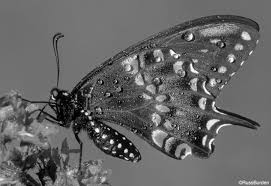

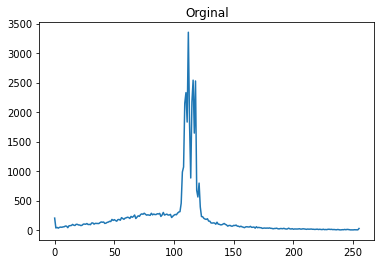

In [ ]:
urlclahe = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/3.2 Images/butterfly.jpg"
img_LAP = cv.imread(urlclahe,cv.IMREAD_GRAYSCALE) 
print("Orginal \n")
cv2_imshow(img_LAP)
gethistogram(img_LAP,"Orginal")

In [ ]:
def Laplacian(imagen):
  laplacianX = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

  laplacianY = np.array((
	[1, 1, 1],
	[1, -8, 1],
	[1, 1, 1]), dtype="int")
  #normalizing the vectors
  Lap_x = convolve(imagen, laplacianX) 
  Lap_y = convolve(imagen, laplacianY) 
  
  #calculate the gradient magnitude of vectors
  lap_out = np.sqrt(np.power(Lap_x, 2) + np.power(Lap_y, 2))
  # mapping values from 0 to 255
  lap_out = (lap_out / np.max(lap_out)) * 255


  return lap_out

Laplacian Image 



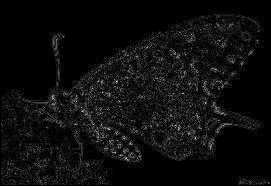

In [ ]:
print("Laplacian Image \n")
lap_out = Laplacian(img_LAP)
cv2_imshow(lap_out)

##2. Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

Orginal 



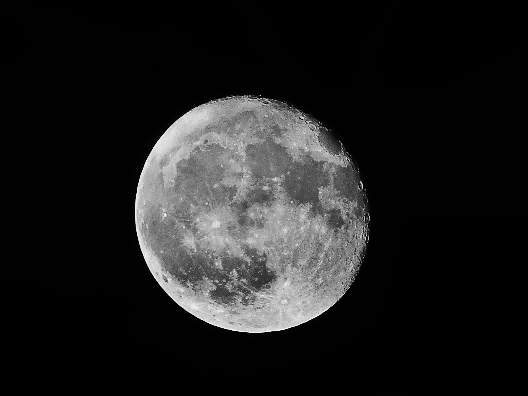

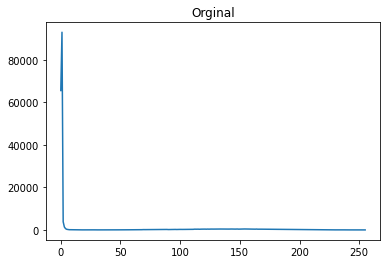

In [ ]:
urlclahe = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/3.2 Images/Luna.jpg"
img_ej2 = cv.imread(urlclahe,cv.IMREAD_GRAYSCALE) 
img_ej2 = cv.resize(img_ej2, (528,396))
print("Orginal \n")
cv2_imshow(img_ej2)
gethistogram(img_ej2,"Orginal")

Sobel Image 



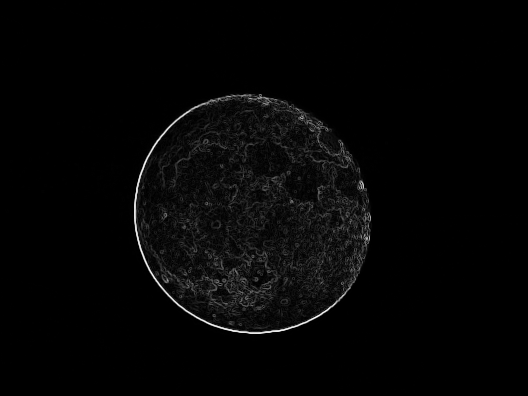

In [ ]:
print("Sobel Image \n")
sobel_image = sobel(img_ej2)
sobel_image = cv.resize(sobel_image, (528,396))
cv2_imshow(sobel_image)

Orginal 



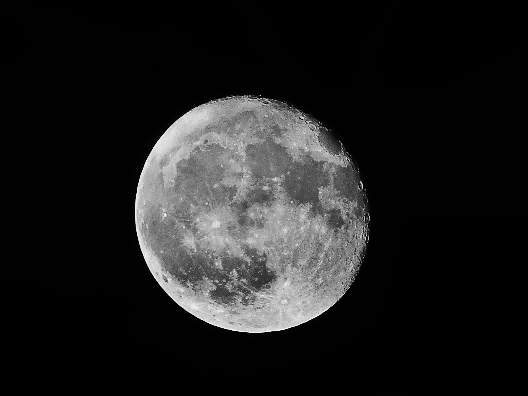

Resaltada 



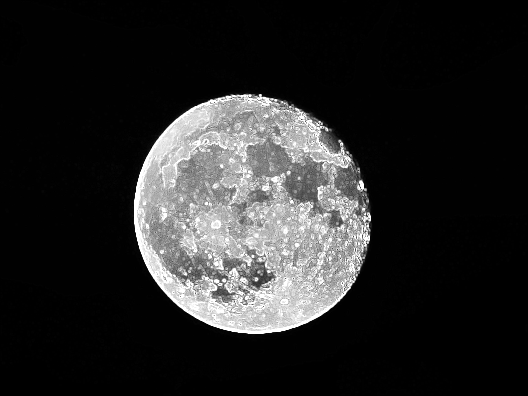

In [ ]:
mascara = 2.0 * sobel_image
suma=img_ej2 + mascara

print("Orginal \n")
cv2_imshow(img_ej2)


print("Resaltada \n")
cv2_imshow(suma)


##3. Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes

Orginal 



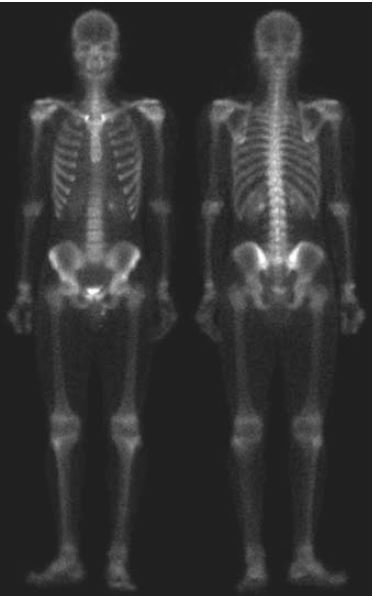

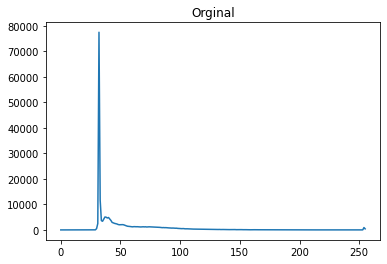

In [ ]:
urlclahe = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/3.2 Images/Esqueleto.JPG"
img_LAPMed = cv.imread(urlclahe,cv.IMREAD_GRAYSCALE) 
print("Orginal \n")
cv2_imshow(img_LAPMed)
gethistogram(img_LAPMed,"Orginal")

Laplacian Image 



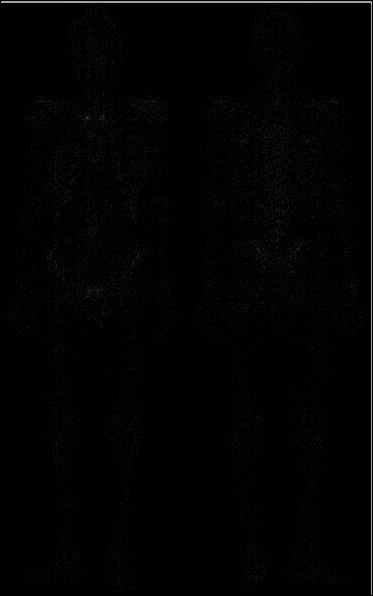

In [ ]:
print("Laplacian Image \n")
lap_out2 = Laplacian(img_LAPMed)
cv2_imshow(lap_out2)

Resaltada 



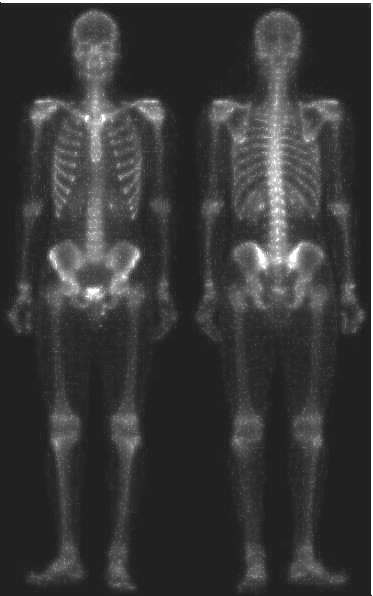

In [ ]:
mascara2 = 2.0 * lap_out2
suma2=img_LAPMed + mascara2

print("Resaltada \n")
cv2_imshow()

Sobel Image 



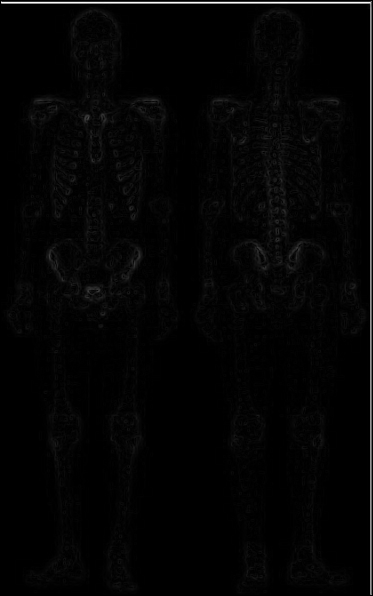

In [ ]:
print("Sobel Image \n")
sobel_image_med = sobel(suma2)
cv2_imshow(sobel_image_med)

Orginal 



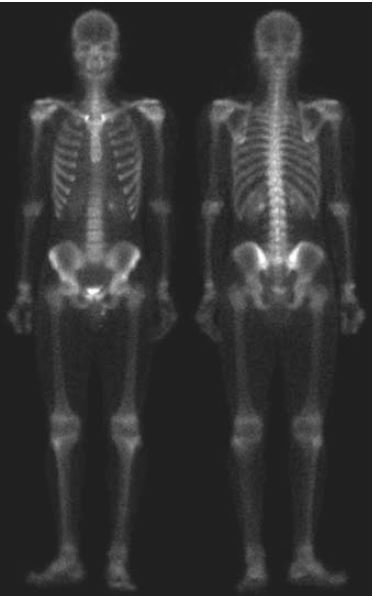

Resaltada 



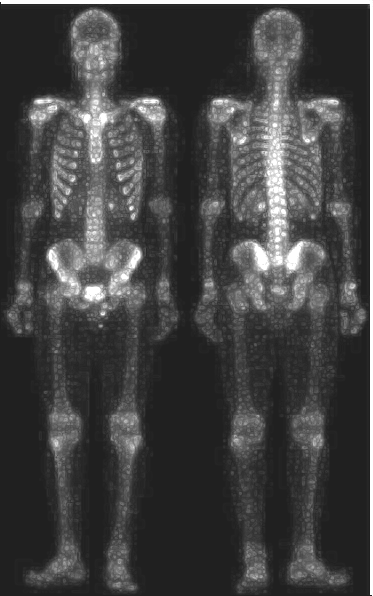

In [ ]:
mascara3 = 3 * sobel_image_med
suma3=suma2 + mascara3

print("Orginal \n")
cv2_imshow(img_LAPMed)


print("Resaltada \n")
cv2_imshow(suma3)

#Referencias

- ArcMap. (2022). Función de convolución. Retrieved from https://desktop.arcgis.com/es/arcmap/latest/manage-data/raster-and-images/convolution-function.htm#:~:text=La%20funci%C3%B3n%20de%20convoluci%C3%B3n%20realiza,realces%20basados%20en%20el%20kernel.

- Gonzalez, R. & Woods, R. (2018). Digital Image Processing.  4° Edition. Pearson.

- Phillip A. Mlsna, Jeffrey J. Rodríguez, Chapter 19 - Gradient and Laplacian Edge Detection, Editor(s): Al Bovik, The Essential Guide to Image Processing,
Academic Press, 2009, Pages 495-524, ISBN 9780123744579, https://doi.org/10.1016/B978-0-12-374457-9.00019-6. (https://www.sciencedirect.com/science/article/pii/B9780123744579000196)

- Saini, A. (19 de 05 de 2019). Edge Detection Using Sobel,Prewitt Operator and Laplacian Operator. Obtenido de https://github.com/abhilas0/edge_detection/blob/master/edge_detection.ipynb

- Ochoa, 4. Image Convolution (2022) Retireved from:
https://github.com/CV-INSIDE/computer-vision-course

- Padrón, A. (08 de 2022). Detección de bordes en datos sísmicos. Obtenido de http://sedici.unlp.edu.ar/bitstream/handle/10915/142588/Documento_completo.pdf?sequence=1

- Ruiz, G. O. (2022). Modulo1. Tema 2.2 Convulción y mejoramiento de imágenes. ITESM.

